In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from multiprocessing import Pool

# Function definition

In [16]:
def format_data(data, column_name):
    df_1 = data[["variable_names", column_name + '_census']].copy()
    df_1.columns = ["variable_names", column_name]
    df_1['hue'] = "Census"
    
    df_2 = data[["variable_names", column_name + '_synthetic']].copy()
    df_2.columns = ["variable_names", column_name]
    df_2['hue'] = "Synthetic"
    
    return pd.concat([df_1, df_2], axis=0)

In [17]:
def check_start_with(string, root_string):
    string = string.split("_")[:len(string.split("_")) - 1]
    string = '_'.join(string)
    bare_string = string.split('.')[0]
    return bare_string == root_string

In [18]:
def return_all_occurences(data, column_name):
    columns = data.columns
    raw_list = [c for c in columns if check_start_with(c, column_name)]
    stripped_strings = ['_'.join(c.split('_')[:len(c.split('_')) - 1]) for c in raw_list]
    return set(stripped_strings)

In [19]:
def wrap_format_data(column_name):
    return format_data(data, column_name)

def format_data_by_category(data, column_name):
    columns = return_all_occurences(data, column_name)
    processes = Pool()
    dfs = processes.map(wrap_format_data, columns)
    return pd.concat(dfs)

In [115]:
def plot_comparison_histograms(data, variable_name, labels=None, figsize=(10,10)):
    df_to_plot = format_data_by_category(data, variable_name)
    df_to_plot.drop(columns=['variable_names'], inplace=True)
    df_to_plot = df_to_plot.groupby("hue").sum().transpose()
    if labels is not None:
        df_to_plot.index = labels
    df_to_plot.plot(kind='bar', figsize=figsize)
    plt.legend(['Census', 'Synthetic'])

# Data 

## Census data 

In [145]:
census_path = "V_2/"
popgen_results_path = "../popgen_results_cedar/"

In [146]:
person_census_data = pd.read_csv(census_path + "person_marginals.csv", encoding="utf-8", skiprows=[1, 2])
household_census_data = pd.read_csv(census_path + "household_marginals.csv", encoding="utf-8", skiprows=[1, 2])

In [147]:
census_data = pd.merge(household_census_data, person_census_data, on='variable_names')

In [148]:
census_data

,variable_names,hh_size,hh_size.1,hh_size.2,hh_size.3,hh_size.4,hh_income,hh_income.1,hh_income.2,hh_income.3,...,age.15,sex,sex.1,workplace,workplace.1,DAUID,CTUID,license_sex,license_sex.1,license_sex.2
0,1,65,135,45,45,25,31,82,83,83,...,49,407,380,36,751,24520101,4620690000,329,290,168
1,2,35,70,40,50,15,11,56,56,73,...,20,314,275,46,543,24520102,4620691000,222,198,169
2,3,10,60,40,35,15,5,36,47,67,...,5,229,247,0,476,24520103,4620691000,165,174,137
3,4,45,85,70,65,40,16,51,98,114,...,25,479,421,35,865,24520104,4620691000,346,296,258
4,5,35,80,35,30,20,24,48,59,58,...,20,283,256,35,504,24520105,4620691000,204,185,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,6438,80,130,75,45,40,44,93,88,105,...,15,525,456,25,956,24750245,4620740030,346,325,310
6438,6439,95,265,135,160,75,46,154,174,255,...,25,1091,985,70,2006,24750247,4620740030,800,723,553
6439,6440,240,395,265,325,155,101,278,293,505,...,60,2032,1925,180,3777,24750248,4620740040,1410,1303,1244
6440,6441,135,175,40,45,20,81,100,94,94,...,45,473,422,51,844,24760050,4620740010,413,321,161


In [149]:
census_data['pop'] = census_data['sex'] + census_data['sex.1']

In [107]:
census_data.columns

Index(['variable_names', 'hh_size', 'hh_size.1', 'hh_size.2', 'hh_size.3',
       'hh_size.4', 'hh_income', 'hh_income.1', 'hh_income.2', 'hh_income.3',
       'hh_income.4', 'hh_type', 'hh_type.1', 'hh_driving_license',
       'hh_driving_license.1', 'hh_driving_license.2', 'hh_driving_license.3',
       'hh_driving_license.4', 'hh_car', 'hh_car.1', 'hh_car.2', 'hh_car.3',
       'hh_car.4', 'age', 'age.1', 'age.2', 'age.3', 'age.4', 'age.5', 'age.6',
       'age.7', 'age.8', 'age.9', 'age.10', 'age.11', 'age.12', 'age.13',
       'age.14', 'age.15', 'sex', 'sex.1', 'workplace', 'workplace.1', 'DAUID',
       'CTUID', 'license_sex', 'license_sex.1', 'license_sex.2'],
      dtype='object')

## Popgen synthetic data

In [150]:
synthetic_data = pd.read_csv(popgen_results_path + "summary_geo.csv", encoding="utf-7", skiprows=[1, 2])

In [151]:
synthetic_data

,name,age,age.1,age.2,age.3,age.4,age.5,age.6,age.7,age.8,...,hh_size,hh_size.1,hh_size.2,hh_size.3,hh_size.4,license_sex,license_sex.1,license_sex.2,sex,sex.1
0,3183,35.0,26.0,21.0,32.0,55.0,33.0,38.0,45.0,25.0,...,95.0,60.0,40.0,25.0,20.0,142.0,122.0,273.0,253.0,284.0
1,3184,31.0,35.0,10.0,14.0,36.0,39.0,33.0,37.0,31.0,...,105.0,70.0,35.0,15.0,15.0,132.0,112.0,241.0,244.0,241.0
2,3185,22.0,34.0,21.0,16.0,28.0,32.0,59.0,58.0,39.0,...,150.0,80.0,35.0,30.0,5.0,155.0,121.0,300.0,286.0,290.0
3,3186,43.0,46.0,56.0,37.0,66.0,56.0,51.0,73.0,60.0,...,140.0,120.0,55.0,35.0,20.0,219.0,167.0,406.0,376.0,416.0
4,3187,52.0,27.0,29.0,29.0,31.0,58.0,50.0,30.0,42.0,...,95.0,85.0,35.0,20.0,15.0,124.0,131.0,319.0,245.0,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,5840,42.0,42.0,32.0,25.0,52.0,56.0,56.0,26.0,32.0,...,79.0,91.0,35.0,45.0,15.0,234.0,226.0,161.0,318.0,303.0
6436,5841,139.0,115.0,86.0,74.0,114.0,167.0,155.0,157.0,88.0,...,205.0,200.0,135.0,80.0,30.0,507.0,549.0,426.0,750.0,732.0
6437,5842,70.0,77.0,77.0,62.0,18.0,17.0,37.0,79.0,83.0,...,15.0,55.0,35.0,95.0,20.0,156.0,153.0,401.0,326.0,384.0
6438,5843,88.0,98.0,92.0,59.0,18.0,15.0,32.0,60.0,64.0,...,30.0,75.0,35.0,75.0,40.0,177.0,188.0,421.0,343.0,443.0


In [152]:
synthetic_data['pop'] = synthetic_data['sex'] + synthetic_data['sex.1']

## Merge all data

In [153]:
data = pd.merge(census_data, synthetic_data, left_on="variable_names", right_on="name", suffixes=('_census', '_synthetic'))

In [154]:
data

,variable_names,hh_size_census,hh_size.1_census,hh_size.2_census,hh_size.3_census,hh_size.4_census,hh_income,hh_income.1,hh_income.2,hh_income.3,...,hh_size.1_synthetic,hh_size.2_synthetic,hh_size.3_synthetic,hh_size.4_synthetic,license_sex_synthetic,license_sex.1_synthetic,license_sex.2_synthetic,sex_synthetic,sex.1_synthetic,pop_synthetic
0,1,65,135,45,45,25,31,82,83,83,...,135.0,45.0,45.0,25.0,317.0,293.0,168.0,395.0,383.0,778.0
1,2,35,70,40,50,15,11,56,56,73,...,70.0,40.0,50.0,15.0,192.0,212.0,173.0,294.0,283.0,577.0
2,3,10,60,40,35,15,5,36,47,67,...,60.0,40.0,35.0,15.0,150.0,173.0,145.0,209.0,259.0,468.0
3,4,45,85,70,65,40,16,51,98,114,...,85.0,70.0,65.0,40.0,337.0,309.0,258.0,477.0,427.0,904.0
4,5,35,80,35,30,20,24,48,59,58,...,80.0,35.0,30.0,20.0,205.0,179.0,149.0,280.0,253.0,533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,6438,80,130,75,45,40,44,93,88,105,...,130.0,75.0,45.0,40.0,348.0,327.0,306.0,529.0,452.0,981.0
6436,6439,95,265,135,160,75,46,154,174,255,...,265.0,135.0,160.0,75.0,788.0,687.0,582.0,1080.0,977.0,2057.0
6437,6440,240,395,265,325,155,101,278,293,505,...,395.0,265.0,325.0,155.0,1379.0,1290.0,1284.0,2035.0,1918.0,3953.0
6438,6441,135,175,40,45,20,81,100,94,94,...,175.0,40.0,45.0,20.0,290.0,257.0,339.0,381.0,505.0,886.0


# Comparison

## Total population at the dissemination area

In [158]:
data['pop_diff'] = data['pop_census'] - data['pop_synthetic']

In [180]:
test = data[['variable_names', 'pop_diff']] 
data[test['pop_diff'] > 500][['sex_census', 'sex.1_census', 'sex_synthetic', 'sex.1_synthetic']]

,sex_census,sex.1_census,sex_synthetic,sex.1_synthetic
725,940,1432,741.0,1078.0
1039,362,546,62.0,218.0
1089,565,848,308.0,524.0
1773,649,900,286.0,464.0
1786,612,927,407.0,595.0
1878,498,926,150.0,350.0
1928,375,756,161.0,312.0
2142,444,803,172.0,371.0
2165,746,1296,448.0,930.0
2168,765,1212,226.0,384.0


Text(0.5, 1.0, 'Total population')

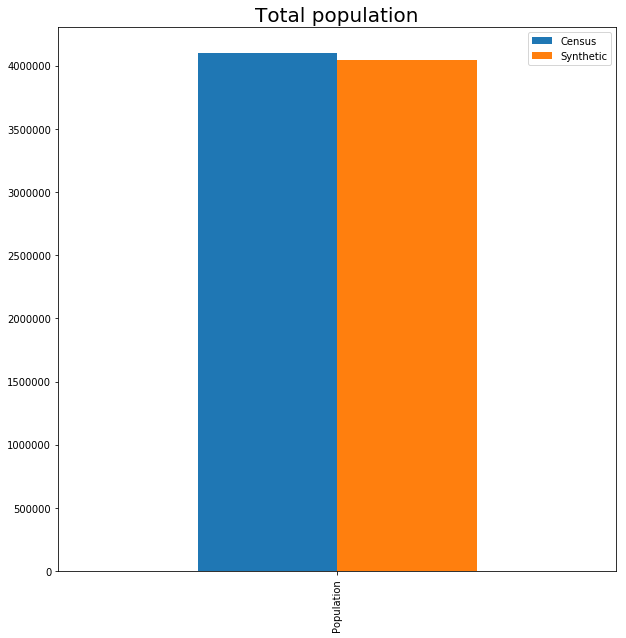

In [217]:
plot_comparison_histograms(data, 'pop', ['Population'])
plt.title("Total population", size=20)

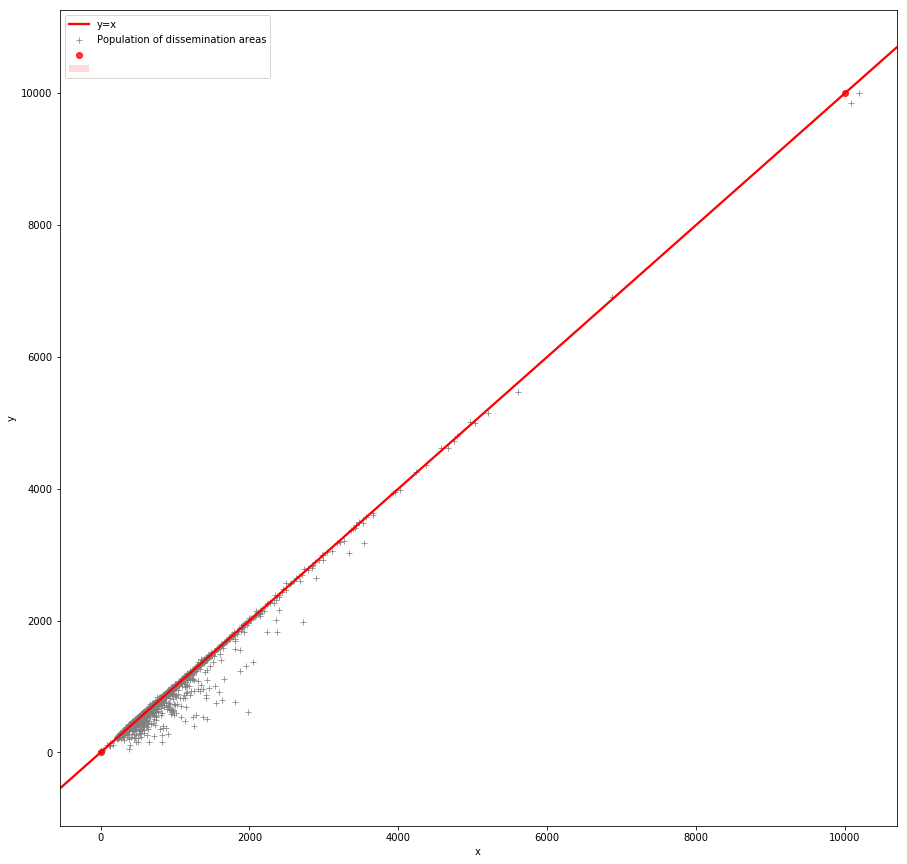

In [207]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(data=data, x='pop_census', y='pop_synthetic', marker='+', color='gray')
sns.regplot(data=pd.DataFrame({"x":[0, 10000], "y":[0, 10000]}), x='x', y='y', ax=ax, color='r', ci=False) 

### Household size 

/home/omanout@forcity.local/.local/share/virtualenvs/playground/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0.5, 0, 'Size of household')

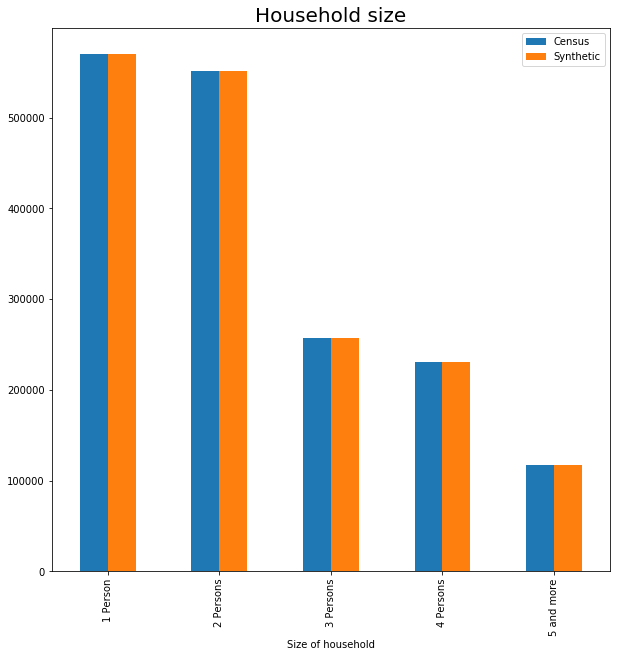

In [109]:
plot_comparison_histograms(data, 'hh_size', ['1 Person', '2 Persons', '3 Persons', '4 Persons', '5 and more'])
plt.title("Household size", size=20)
plt.xlabel("Size of household")

In [214]:
data[['hh_size_synthetic', 'hh_size.1_synthetic', 'hh_size.2_synthetic', 'hh_size.3_synthetic', 'hh_size.4_synthetic']].sum()

hh_size_synthetic      570344.0
hh_size.1_synthetic    550975.0
hh_size.2_synthetic    257109.0
hh_size.3_synthetic    230802.0
hh_size.4_synthetic    117540.0
dtype: float64

In [211]:
data[['hh_size_census', 'hh_size.1_census', 'hh_size.2_census', 'hh_size.3_census', 'hh_size.4_census']].

hh_size_census      570333
hh_size.1_census    551025
hh_size.2_census    257104
hh_size.3_census    230783
hh_size.4_census    117516
dtype: int64

### Car ownership at the household level

/home/omanout@forcity.local/.local/share/virtualenvs/playground/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0.5, 0, 'Number of cars')

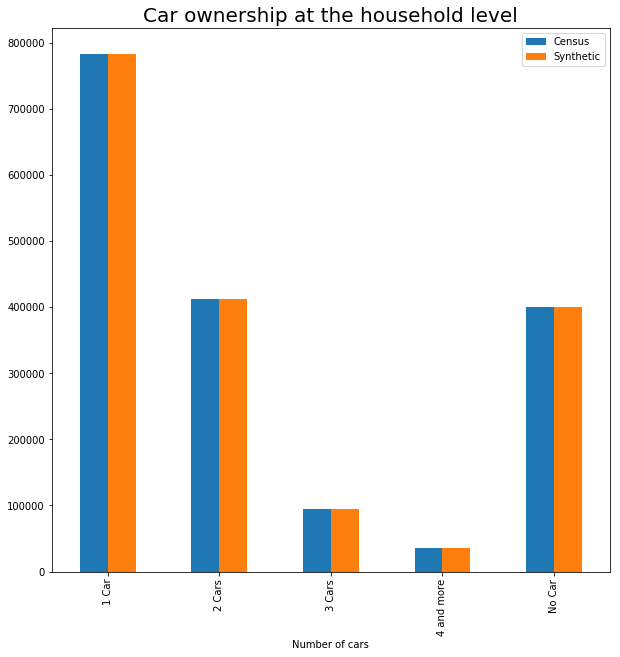

In [106]:
plot_comparison_histograms(data, 'hh_car', ['1 Car', '2 Cars', '3 Cars', '4 and more', 'No Car'])
plt.title("Car ownership at the household level", size=20)
plt.xlabel("Number of cars")

### Household members with a driving license

/home/omanout@forcity.local/.local/share/virtualenvs/playground/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0.5, 0, 'Size')

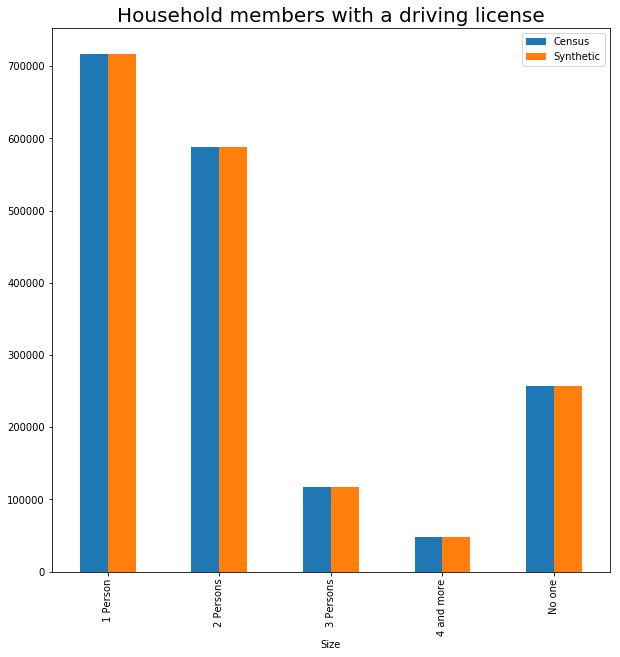

In [112]:
plot_comparison_histograms(data, 'hh_driving_license', ['1 Person', '2 Persons', '3 Persons', '4 and more', 'No one'])
plt.title("Household members with a driving license", size=20)
plt.xlabel("Size")

### Age

/home/omanout@forcity.local/.local/share/virtualenvs/playground/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0.5, 0, 'Age in years')

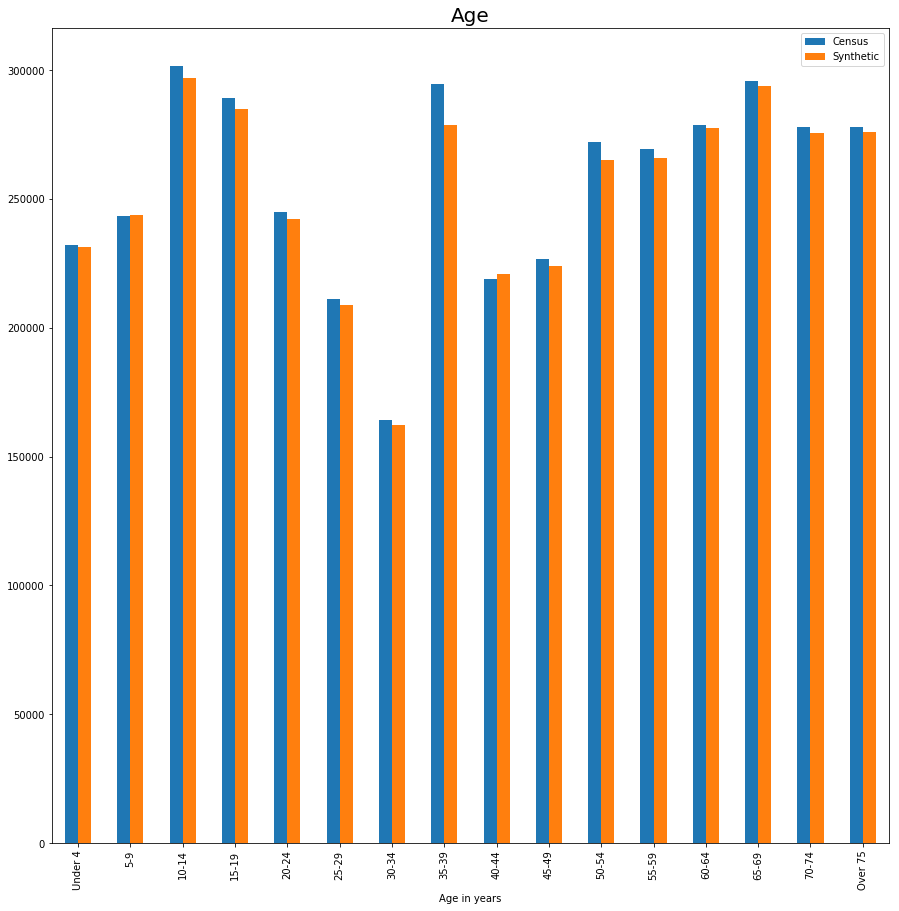

In [116]:
plot_comparison_histograms(data, 'age', 
                           ['Under 4', '5-9', '10-14', '15-19', '20-24', '25-29',
                            '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
                            '60-64', '65-69', '70-74', 'Over 75'], figsize=(15, 15))
plt.title("Age", size=20)
plt.xlabel("Age in years")

### Gender 

/home/omanout@forcity.local/.local/share/virtualenvs/playground/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0.5, 0, '')

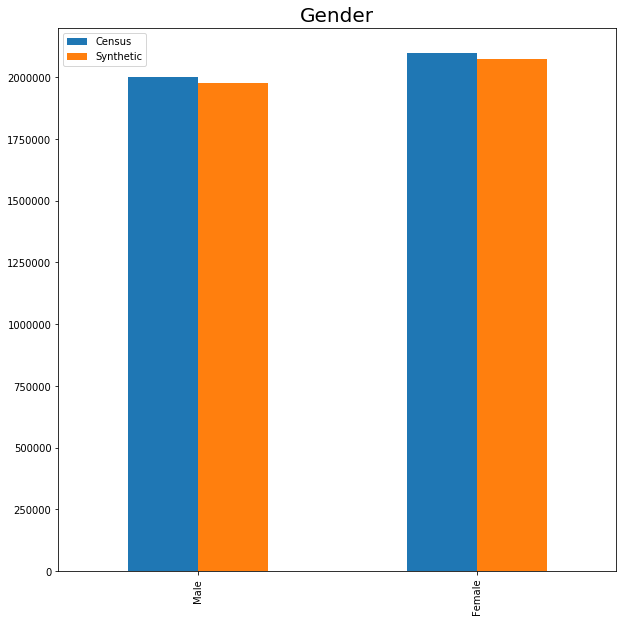

In [119]:
plot_comparison_histograms(data, 'sex', ['Male', 'Female'])
plt.title("Gender", size=20)
plt.xlabel(None)

### Driving licence by gender 

/home/omanout@forcity.local/.local/share/virtualenvs/playground/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0.5, 0, '')

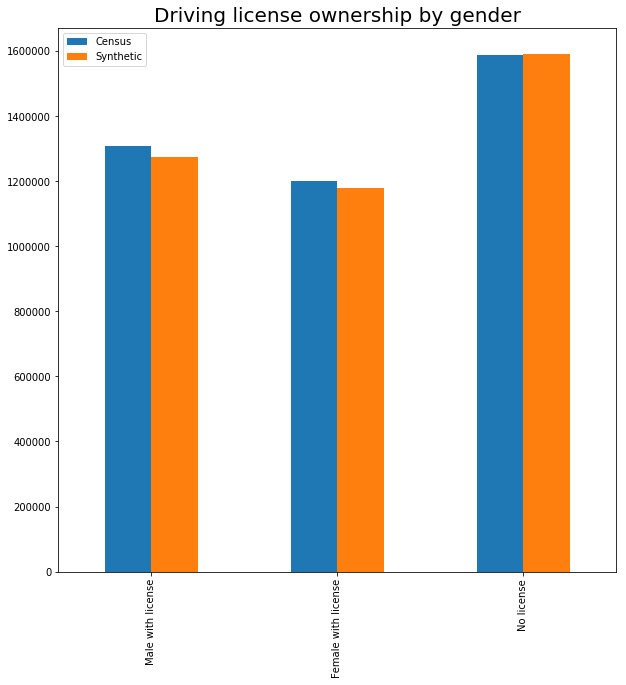

In [122]:
plot_comparison_histograms(data, 'license_sex', ['Male with license', 'Female with license', 'No license'])
plt.title("Driving license ownership by gender", size=20)
plt.xlabel(None)